# 数据增强实例

## 引入各种包

In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import time
import datetime
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## 指定目录

In [2]:
base_dir = './data/cats_and_dogs'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

## 构建模型

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(1, activation='sigmoid')
])



## 设置参数

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['acc'])

# 加入多种变换

In [5]:
time1 = time.time()
# 训练数据
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
# 验证数据
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(64, 64),  
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(64, 64),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

print(datetime.timedelta(seconds = time.time() - time1))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
100/100 - 25s - loss: 0.6917 - acc: 0.5235 - val_loss: 0.6793 - val_acc: 0.5790
Epoch 2/100
100/100 - 13s - loss: 0.6802 - acc: 0.5680 - val_loss: 0.6624 - val_acc: 0.5650
Epoch 3/100
100/100 - 14s - loss: 0.6651 - acc: 0.5885 - val_loss: 0.7004 - val_acc: 0.5150
Epoch 4/100
100/100 - 14s - loss: 0.6533 - acc: 0.6190 - val_loss: 0.6223 - val_acc: 0.6370
Epoch 5/100
100/100 - 14s - loss: 0.6442 - acc: 0.6155 - val_loss: 0.6381 - val_acc: 0.6140
Epoch 6/100
100/100 - 14s - loss: 0.6249 - acc: 0.6365 - val_loss: 0.6048 - val_acc: 0.6630
Epoch 7/100
100/100 - 14s - loss: 0.6128 - acc: 0.6620 - val_loss: 0.5778 - val_acc: 0.6880
Epoch 8/100
100/100 - 14s - loss: 0.6054 - acc: 0.6635 - val_loss: 0.5596 - val_acc: 0.7010
Epoch 9/100
100/100 - 14s - loss: 0.6027 - acc: 0.6725 - val_loss: 0.5584 - val_acc: 0.7050
Epoch 10/100

Epoch 86/100
100/100 - 13s - loss: 0.4314 - acc: 0.7980 - val_loss: 0.4696 - val_acc: 0.7820
Epoch 87/100
100/100 - 13s - loss: 0.4186 - acc: 0.8055 - val_loss: 0.4504 - val_acc: 0.7830
Epoch 88/100
100/100 - 12s - loss: 0.4249 - acc: 0.8020 - val_loss: 0.4542 - val_acc: 0.7790
Epoch 89/100
100/100 - 13s - loss: 0.4189 - acc: 0.8055 - val_loss: 0.4495 - val_acc: 0.7800
Epoch 90/100
100/100 - 13s - loss: 0.4198 - acc: 0.8105 - val_loss: 0.4510 - val_acc: 0.7920
Epoch 91/100
100/100 - 13s - loss: 0.4150 - acc: 0.8165 - val_loss: 0.4524 - val_acc: 0.7860
Epoch 92/100
100/100 - 13s - loss: 0.4049 - acc: 0.8240 - val_loss: 0.4552 - val_acc: 0.7880
Epoch 93/100
100/100 - 13s - loss: 0.4183 - acc: 0.8175 - val_loss: 0.4752 - val_acc: 0.7760
Epoch 94/100
100/100 - 14s - loss: 0.4139 - acc: 0.8055 - val_loss: 0.4618 - val_acc: 0.7900
Epoch 95/100
100/100 - 14s - loss: 0.4068 - acc: 0.8160 - val_loss: 0.4417 - val_acc: 0.7980
Epoch 96/100
100/100 - 15s - loss: 0.4134 - acc: 0.8155 - val_loss: 0.

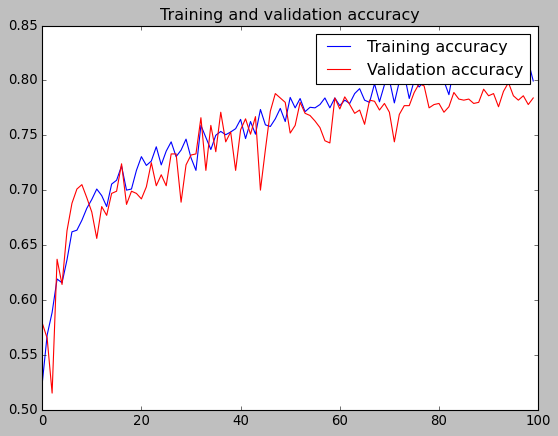

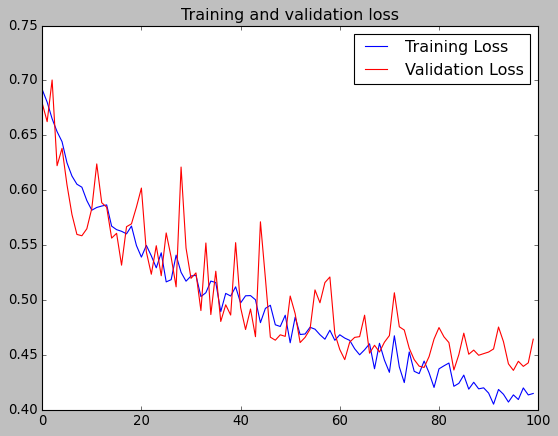

In [6]:
import matplotlib.pyplot as plt
plt.style.use('classic')
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 练手：加入dropout观察效果

tf.keras.layers.Dropout(0.5)